In [1]:
import sys
sys.path.append("..")
import splitwavepy as sw

import scipy
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def window_scan(pair,widths,offsets,**kwargs):
    """
    Returns a list of EigenM measurements.
    
    trials all combinations of *offsets* and *widths* windows
    """    
    
    if not isinstance(pair,sw.Pair):
        raise Exception('pair must be a Pair')
        
    if not isinstance(offsets,np.ndarray):
        raise Exception('offsets must be a numpy.array')
    
    if not isinstance(widths,np.ndarray):
        raise Exception('widths must be a numpy.ndarray')
    
    # grunt work using list comprehension
    listM = [ [ sw.EigenM(pair,window=sw.Window(w,o,**kwargs)) for w in widths ] for o in offsets ]
    
    return listM

In [16]:
p = sw.Pair(fast=45,lag=2.3,delta=0.1)

In [17]:
widths = np.arange(51,151,25)
offsets = np.arange(-40,60,20)

In [18]:
listM = window_scan(p,widths,offsets)

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


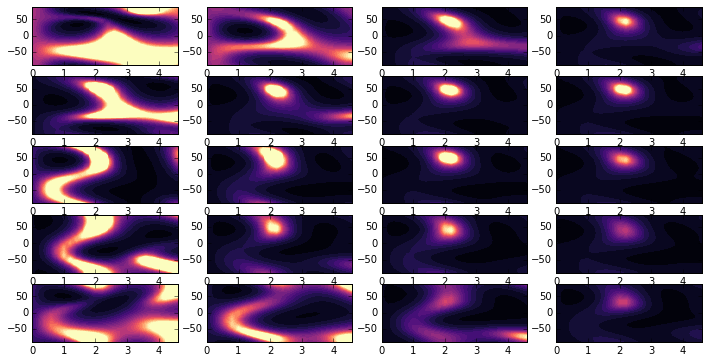

In [19]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(len(offsets),len(widths))
v = np.linspace(0, 50, 26, endpoint=True)
for ii in range(len(offsets)):
    for jj in range(len(widths)):
        ax = plt.subplot(gs[ii,jj])
        m = listM[ii][jj]
        ax.contourf(m.tlags,m.degs,m.lam1/m.lam2,v,cmap='magma',extend='max')

plt.show()

/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/glyjw/anaconda/envs/py35/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


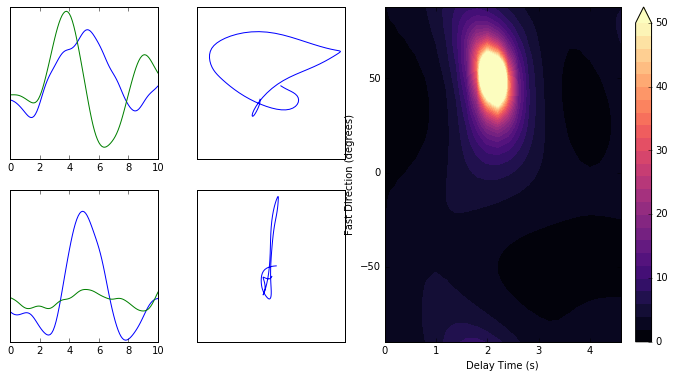

In [22]:
listM[2][2].plot()